In [1]:

import pandas as pd
import scienceplots
import matplotlib_inline
import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

### Артефакты моделей

Артефакты моделей были загружены в соответствующий репозиторий на [HuggingFace]()

За основу для экспериментов по DPO-алайменту была взята инструктированная модель [SmolLM2-135M-Instruct](https://huggingface.co/HuggingFaceTB/SmolLM2-135M-Instruct). В качестве набора данных использовался был взят [ultrafeedback_binarized](https://huggingface.co/datasets/trl-lib/ultrafeedback_binarized).


### __Параметры для Reverse KL__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta \in [0.05, 0.1, 1.0, 5.0]$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для Forward KL__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для $\alpha$-divergence__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, показатель степени $\alpha$-дивергенции $\alpha=0.5$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры для JS-divergence__

Шаг обучения $5e-5$, коэффициент при слагаемом дивергенции $\beta = 0.1$, размер батча $4$, шаг накопления градиента $4$, количество итераций $200$, максимальная длина промтов $1024$

### __Параметры генерации ответов__

Были взяты следубщие параметры. Температура $0.8$, top_p $0.95$, top_n $50$, максимальная длина генерируемого текста $512$,


In [13]:
loss_df = pd.read_csv('../data/train-loss.csv')['train/loss']
rewards_chosen_df = pd.read_csv('../data/train-rewards-chosen.csv')['train/rewards/chosen']
rewards_rejected_df = pd.read_csv('../data/train-rewards-rejected.csv')['train/rewards/rejected']

steps = [i for i in range(0, 200)]

# alpha divergence 0.5
loss_df_1, rewards_chosen_df_1, rewards_rejected_df_1 = loss_df[:200], rewards_chosen_df[:200], rewards_rejected_df[:200]
# reverse kl 0.05
loss_df_2, rewards_chosen_df_2, rewards_rejected_df_2 = loss_df[200:400], rewards_chosen_df[200:400], rewards_rejected_df[200:400]
# reverse kl 0.1
loss_df_3, rewards_chosen_df_3, rewards_rejected_df_3 = loss_df[400:600], rewards_chosen_df[400:600], rewards_rejected_df[400:600]
# reverse kl 1.0
loss_df_4, rewards_chosen_df_4, rewards_rejected_df_4 = loss_df[600:800], rewards_chosen_df[600:800], rewards_rejected_df[600:800]
# reverse kl 5.0
loss_df_5, rewards_chosen_df_5, rewards_rejected_df_5 = loss_df[800:1000], rewards_chosen_df[800:1000], rewards_rejected_df[800:1000]
# forward kl
loss_df_6, rewards_chosen_df_6, rewards_rejected_df_6 = loss_df[1000:1200], rewards_chosen_df[1000:1200], rewards_rejected_df[1000:1200]
# js divergence
loss_df_7, rewards_chosen_df_7, rewards_rejected_df_7 = loss_df[1200:], rewards_chosen_df[1200:], rewards_rejected_df[1200:]

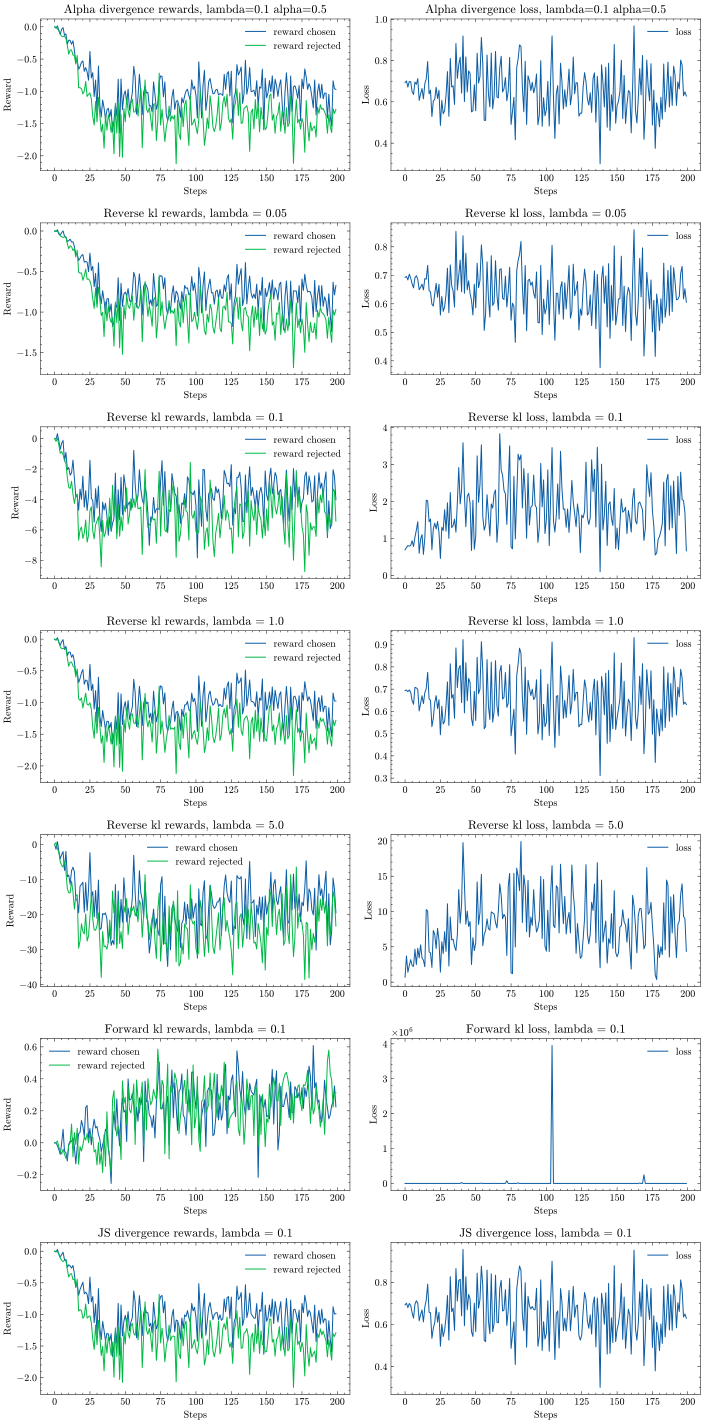

In [37]:
dfs = [
    ((rewards_chosen_df_1, rewards_rejected_df_1), loss_df_1, 'Alpha divergence', 'lambda=0.1 alpha=0.5'),
    ((rewards_chosen_df_2, rewards_rejected_df_2), loss_df_2, 'Reverse kl', 'lambda = 0.05'),
    ((rewards_chosen_df_3, rewards_rejected_df_3), loss_df_3, 'Reverse kl', 'lambda = 0.1'),
    ((rewards_chosen_df_4, rewards_rejected_df_4), loss_df_4, 'Reverse kl', 'lambda = 1.0'),
    ((rewards_chosen_df_5, rewards_rejected_df_5), loss_df_5, 'Reverse kl', 'lambda = 5.0'),
    ((rewards_chosen_df_6, rewards_rejected_df_6), loss_df_6, 'Forward kl', 'lambda = 0.1'),
    ((rewards_chosen_df_7, rewards_rejected_df_7), loss_df_7, 'JS divergence', 'lambda = 0.1'),
]

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
axs = axs.flatten()

j = 0
steps = [i for i in range(0, 200)]
for i, ax in enumerate(axs):

    if (i+1) % 2 != 0:
        ax.plot(steps, dfs[j][0][0], label='reward chosen')
        ax.plot(steps, dfs[j][0][1], label='reward rejected')
        ax.set_ylabel('Reward')
        ax.title.set_text(dfs[j][2] + ' rewards, ' + dfs[j][3])
    else:
        ax.plot(steps, dfs[j][1], label='loss')
        ax.set_ylabel('Loss')
        ax.title.set_text(dfs[j][2] + ' loss, ' + dfs[j][3])
        j += 1


    ax.legend()
    ax.set_xlabel('Steps')

plt.tight_layout()
plt.show()

Ниже представлена таблица $winrate$ для выровненных моделей относительно модели $SFT$

In [211]:
wr_kl = pd.read_csv('../data/winrate_kl.csv')

wr_kl[['model', 'winrate']]

,model,winrate
0,SMOL_DPO_ALPHA_DIVERGENCE-checkpoint-200,0.59
1,SMOL_DPO_FORWARD_KL_0_1-checkpoint-200,0.54
2,SMOL_DPO_JS_DIVERGENCE-checkpoint-200,0.52
3,SMOL_DPO_REVERSE_KL_0_05-checkpoint-200,0.60
4,SMOL_DPO_REVERSE_KL_0_1-checkpoint-200,0.57
5,SMOL_DPO_REVERSE_KL_1_0-checkpoint-200,0.53
6,SMOL_DPO_REVERSE_KL_5_0-checkpoint-200,0.61


Подсчет осуществлялся при помощи функциональности ранжирования, встроенной в `PairRM`. Winrate рассчитывался как доля заалайненных ответов, которым ранкер присвоил метку 1.

При таком подходе на первое место выходим Reverse KL модель с величиной коэффициента регуляризации $\lambda=5$

In [286]:
wr_kl

,model,winrate,kl_values,kl_mean
0,SMOL_DPO_ALPHA_DIVERGENCE-checkpoint-200,0.59,[15.95181942 5.9152689 12.34866619 0.225529...,9.721168
1,SMOL_DPO_FORWARD_KL_0_1-checkpoint-200,0.54,[7.09414148e+00 5.29551581e-02 5.24593544e+00 ...,4.655598
2,SMOL_DPO_JS_DIVERGENCE-checkpoint-200,0.52,[2.00305519e+01 1.03605673e-01 1.10312595e+01 ...,8.919883
3,SMOL_DPO_REVERSE_KL_0_05-checkpoint-200,0.60,[27.45120239 5.99377012 16.71171379 0.070213...,13.442241
4,SMOL_DPO_REVERSE_KL_0_1-checkpoint-200,0.57,[15.75506592 5.0621748 11.27523613 0.110416...,10.160888
5,SMOL_DPO_REVERSE_KL_1_0-checkpoint-200,0.53,[1.17473354e+01 6.22720659e-01 3.29847264e+00 ...,4.997845
6,SMOL_DPO_REVERSE_KL_5_0-checkpoint-200,0.61,[1.08103104e+01 1.84800243e+00 5.45679474e+00 ...,5.080826


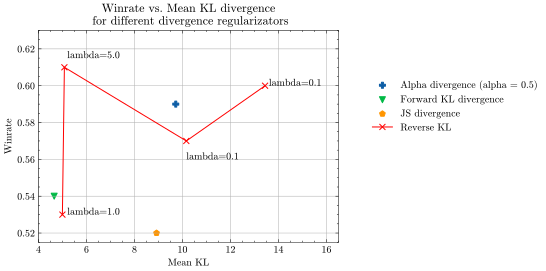

In [280]:
plt.figure(figsize=(8,4))

plt.scatter([9.721168], [0.59], marker= "P", label='Alpha divergence (alpha = 0.5)')
plt.scatter([4.655598], [0.54], marker='v', label='Forward KL divergence')
plt.scatter([8.919883], [0.52], marker='p', label='JS divergence')

plt.plot([4.997845, 5.080826, 10.160888, 13.442241], [0.53, 0.61, 0.57 , 0.60], marker= "x", color='red', label='Reverse KL')


plt.xlabel('Mean KL')
plt.ylabel('Winrate')
plt.grid(True)

plt.title("Winrate vs. Mean KL divergence\n for different divergence regularizators")

plt.text(5.2, 0.53, 'lambda=1.0')
plt.text(5.2, 0.615, 'lambda=5.0')
plt.text(10.16, 0.56, 'lambda=0.1')
plt.text(13.6, 0.60, 'lambda=0.1')

plt.ylim([0.515, 0.63])
plt.xlim([4, 16.5])
plt.legend(loc=(1.1, 0.5))
plt.tight_layout()
plt.show()

Для подсчета средней KL дивергенции для сгенерированных ответов выровненной модели через:


- Выровненную модель;
- SFT модель;

с целью получения логитов. Далее я взял лишь логиты, соответствующие `assistant` части и рассчитал KL дивергенцию для каждого текста. Код можно найти в `kl_divergence.py`. Полученные дивергенции усреднил.

Результат можно увидеть на графике.

Все модели при заданном походе обходят SFT модель. Для reverse-kl на мой взгляд результат неоднозначный, интуитивно казалось, что увеличение коэффициента регуляризации должно сдвигать среднее значение дивергенции в бОльшую сторону, но эффект ровно обратный.